## Install Vertex AI SDK for Python and other dependencies

In [ ]:
! pip3 install --upgrade --user google-cloud-aiplatform pymupdf

## Restart current kernel

In [34]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [4]:

# Initialize Vertex AI
import vertexai
import subprocess

PROJECT_ID = ""
LOCATION = "us-central1"

PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [5]:
# Import libraries

from IPython.display import Markdown, display
from vertexai.generative_models import (
    Content,
    GenerationConfig,
    GenerationResponse,
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
    Image,
    Part,
)

In [6]:
# Load the Gemini models

text_model = GenerativeModel("gemini-1.0-pro")
multimodal_model = GenerativeModel("gemini-1.0-pro-vision")

In [7]:
# Download custom modules and utilities

import os
import urllib.request
import sys

if not os.path.exists("utils"):
    os.makedirs("utils")


# download the helper scripts from utils folder
url_prefix = "https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/retrieval-augmented-generation/utils/"
files = ["intro_multimodal_rag_utils.py"]

for fname in files:
    urllib.request.urlretrieve(f"{url_prefix}/{fname}", filename=f"utils/{fname}")

In [8]:
import importlib
import utils.intro_multimodal_rag_utils
importlib.reload(utils.intro_multimodal_rag_utils)
from utils.intro_multimodal_rag_utils import get_document_metadata

In [9]:
# Specify the PDF folder with multiple PDF

# pdf_folder_path = "/content/data/" # if running in Google Colab/Colab Enterprise
pdf_folder_path = "data/"  # if running in Vertex AI Workbench.

# Specify the image description prompt. Change it
image_description_prompt = """Explain what is going on in the image.
If it's a table, extract all elements of the table.
If it's a graph, explain the findings in the graph.
Do not include any numbers that are not mentioned in the image.
"""

# Extract text and image metadata from the PDF document
text_metadata_df, image_metadata_df = get_document_metadata(
    multimodal_model,  # we are passing gemini 1.0 pro vision model
    pdf_folder_path,
    image_save_dir="images",
    image_description_prompt=image_description_prompt,
    embedding_size=1408,
    # add_sleep_after_page = True, # Uncomment this if you are running into API quota issues
    # sleep_time_after_page = 5,
    # generation_config = # see next cell
    # safety_settings =  # see next cell
)

print("\n\n --- Completed processing. ---")



 Processing the file: --------------------------------- data/LLM Powered Autonomous Agents _ Lil'Log.pdf 


Processing page: 1
Extracting image from page: 1, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_0_0_29.jpeg
Processing page: 2
Extracting image from page: 2, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_1_0_44.jpeg
Extracting image from page: 2, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_1_1_56.jpeg
Processing page: 3
Extracting image from page: 3, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_2_0_65.jpeg
Extracting image from page: 3, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_2_1_66.jpeg
Processing page: 4
Extracting image from page: 4, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_3_0_76.jpeg
Extracting image from page: 4, saved as: images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_3_1_79.jpeg
Processing page: 5
Extracting image from pag

In [11]:
text_metadata_df.head()

,file_name,page_num,text,text_embedding_page,chunk_number,chunk_text,text_embedding_chunk
0,LLM Powered Autonomous Agents _ Lil'Log.pdf,1,Posts\nArchive\nSearch\nTags\nFAQ\nemojisearch...,"[0.013749769888818264, -0.0219533983618021, -0...",1,Posts\nArchive\nSearch\nTags\nFAQ\nemojisearch...,"[0.012379837222397327, -0.024259723722934723, ..."
1,LLM Powered Autonomous Agents _ Lil'Log.pdf,1,Posts\nArchive\nSearch\nTags\nFAQ\nemojisearch...,"[0.013749769888818264, -0.0219533983618021, -0...",2,"ctions, learn from mistakes and refine them fo...","[0.010702413506805897, -0.026050426065921783, ..."
2,LLM Powered Autonomous Agents _ Lil'Log.pdf,2,"execution capability, access to proprietary in...","[-0.0008855572086758912, -0.02053520269691944,...",1,"execution capability, access to proprietary in...","[-0.002817387692630291, -0.02366655319929123, ..."
3,LLM Powered Autonomous Agents _ Lil'Log.pdf,2,"execution capability, access to proprietary in...","[-0.0008855572086758912, -0.02053520269691944,...",2,structure. The search process can be BFS (bre...,"[0.010865950956940651, -0.024091733619570732, ..."
4,LLM Powered Autonomous Agents _ Lil'Log.pdf,3,"Another quite distinct approach, LLM+P (Liu et...","[0.00931392889469862, -0.003861272009089589, -...",1,"Another quite distinct approach, LLM+P (Liu et...","[0.023535802960395813, -0.006164872087538242, ..."


In [12]:
image_metadata_df.head()

,file_name,page_num,img_num,img_path,img_desc,mm_embedding_from_img_only,text_embedding_from_image_description
0,LLM Powered Autonomous Agents _ Lil'Log.pdf,1,1,images/LLM Powered Autonomous Agents _ Lil'Log...,The image is a button with an up arrow.,"[-0.0104724709, 0.032257963, -0.0125136878, 0....","[-0.0031390003859996796, -0.06364692747592926,..."
1,LLM Powered Autonomous Agents _ Lil'Log.pdf,2,1,images/LLM Powered Autonomous Agents _ Lil'Log...,The image shows a block diagram of an agent's...,"[0.0044444995, 0.0575995184, -0.0193264503, 0....","[-0.01187675166875124, -0.018959825858473778, ..."
2,LLM Powered Autonomous Agents _ Lil'Log.pdf,3,1,images/LLM Powered Autonomous Agents _ Lil'Log...,The image is a table that describes the actio...,"[0.0185071472, 0.0107996278, -0.0432227552, -0...","[-0.018743101507425308, 0.0009240250219590962,..."
3,LLM Powered Autonomous Agents _ Lil'Log.pdf,4,1,images/LLM Powered Autonomous Agents _ Lil'Log...,The image shows a reinforcement learning syst...,"[-0.0157523043, 0.0594197251, -0.0163411517, 0...","[-0.010368458926677704, -0.05232059583067894, ..."
4,LLM Powered Autonomous Agents _ Lil'Log.pdf,5,1,images/LLM Powered Autonomous Agents _ Lil'Log...,The image contains two graphs.\n\nThe first g...,"[0.0179234501, 0.0208589211, -0.0621056408, 0....","[0.024233222007751465, -0.08186078071594238, -..."


## Import the helper functions to implement RAG

In [10]:
from utils.intro_multimodal_rag_utils import (
    get_similar_text_from_query,
    print_text_to_text_citation,
    get_similar_image_from_query,
    print_text_to_image_citation,
    get_gemini_response,
    display_images,
)

In [12]:

query = """Questions:
 - What are LLM autonomous agents and what are their benefits?
 - What are the three components of LLM agents?
 - Explian how Reflexion framework works.
 - Give a few example use cases that LLM autonomous agents can help with?
 - How to build an LLM autonomous agent?
 - Briefly explain what MIPS means?
 - Which algorithm performs the best for MIPS as depicted in the graph and what's the max number of queries per second it can achieve?
 - Briefly explain what HuggingGPT is and its components.
 """

In [13]:
# Matching user text query with "chunk_embedding" to find relevant chunks.


matching_results_chunks_data = get_similar_text_from_query(
    query,
    text_metadata_df,
    column_name="text_embedding_chunk",
    top_n=10,
    chunk_text=True,
)

# Print the matched text citations
print_text_to_text_citation(matching_results_chunks_data, print_top=True, chunk_text=True)

Citation 1: Matched text: 

score:  0.79
file_name:  LLM Powered Autonomous Agents _ Lil'Log.pdf
page_number:  1
chunk_number:  2
chunk_text:  ctions, learn from mistakes and refine them for future steps, thereby improving the
quality of final results.
Memory
Short-term memory: I would consider all the in-context learning (See Prompt Engineering)
as utilizing short-term memory of the model to learn.
Long-term memory: This provides the agent with the capability to retain and recall
(infinite) information over extended periods, often by leveraging an external vector store
and fast retrieval.
Tool use
The agent learns to call external APIs for extra information that is missing from the model
weights (often hard to change after pre-training), including current information, code
4/29/24, 11:47 PM
LLM Powered Autonomous Agents | Lil'Log
https://lilianweng.github.io/posts/2023-06-23-agent/?ref=emergentmind
1/24



In [14]:
# Get all relevant images based on user query
matching_results_image_fromdescription_data = get_similar_image_from_query(
    text_metadata_df,
    image_metadata_df,
    query=query,
    column_name="text_embedding_from_image_description",
    image_emb=False,
    top_n=10,
    embedding_size=1408,
)

In [17]:
# combine all the selected relevant text chunks
context_text = []
for key, value in matching_results_chunks_data.items():
    context_text.append(value["chunk_text"])
final_context_text = "\n".join(context_text)

# combine all the relevant images and their description generated by Gemini
context_images = []
for key, value in matching_results_image_fromdescription_data.items():
    context_images.extend(
        ["Image: ", value["image_object"], "Caption: ", value["image_description"]]
    )

In [18]:
prompt = f""" Instructions: Compare the images and the text provided as Context: to answer multiple Question:
Make sure to think thoroughly before answering the question and put the necessary steps to arrive at the answer in bullet points for easy explainability.
If unsure, respond, "Not enough context to answer".

Context:
 - Text Context:
 {final_context_text}
 - Image Context:
 {context_images}


{query}

Answer:
"""

# Generate Gemini response with streaming output
Markdown(
    get_gemini_response(
        text_model,
        model_input=[prompt],
        stream=True,
        generation_config=GenerationConfig(temperature=0.4, max_output_tokens=2048),
    )
)

## LLM Autonomous Agents:

**What are they?**

LLM autonomous agents are systems that use large language models (LLMs) as their core controller. These agents can learn and adapt to new situations, making them ideal for tasks that require flexibility and adaptability.

**Benefits:**

* **Increased efficiency:** LLMs can automate many tasks that would otherwise require human intervention.
* **Improved accuracy:** LLMs can learn from large amounts of data, which can lead to more accurate results than traditional methods.
* **Greater flexibility:** LLMs can be adapted to new tasks and situations without the need for extensive reprogramming.

## Use Cases:

* **Customer service:** LLMs can be used to answer customer questions and resolve issues.
* **Content creation:** LLMs can be used to generate text, code, and other types of content.
* **Data analysis:** LLMs can be used to analyze data and identify patterns.
* **Scientific research:** LLMs can be used to design and conduct experiments.

## Building an LLM Autonomous Agent:

* **Choose an LLM:** There are many different LLMs available, each with its own strengths and weaknesses. Choose an LLM that is well-suited to the task you want to accomplish.
* **Train the LLM:** Train the LLM on a dataset that is relevant to the task you want it to perform.
* **Develop an agent architecture:** Design an agent architecture that will allow the LLM to interact with the environment and achieve its goals.
* **Test and refine the agent:** Test the agent in a variety of scenarios and make adjustments as needed.

## MIPS:

MIPS stands for Maximum Inner Product Search. It is a technique used to find the nearest neighbors of a query vector in a high-dimensional space.

## Best MIPS Algorithm:

The best MIPS algorithm depends on the specific application. However, some of the most popular algorithms include:

* **LSH (Locality-Sensitive Hashing):** LSH is a fast and efficient algorithm that can be used for approximate nearest neighbor search.
* **ANNOY (Approximate Nearest Neighbors Oh Yeah):** ANNOY is another fast and efficient algorithm that can be used for approximate nearest neighbor search.
* **ScaNN (Scalable Nearest Neighbors):** ScaNN is a more accurate algorithm that can be used for exact nearest neighbor search.

## HuggingGPT:

HuggingGPT is a framework that uses ChatGPT as the task planner to select models available in the HuggingFace platform according to the model descriptions and summarize the response based on the execution results.

**Components:**

* **Task planning:** LLM works as the brain and parses the user requests into multiple tasks.
* **Model selection:** The system selects the appropriate model for each task based on the task description.
* **Task execution:** The selected model executes the task and generates a response.
* **Response generation:** LLM receives the execution results and provides summarized results to users.

---------------Matched Images------------------



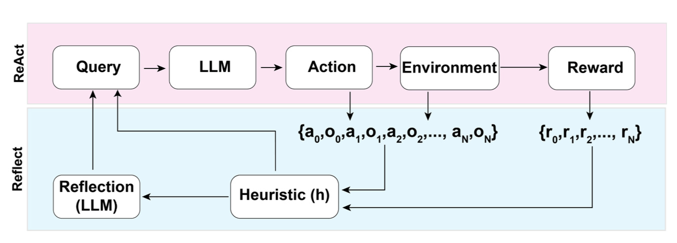

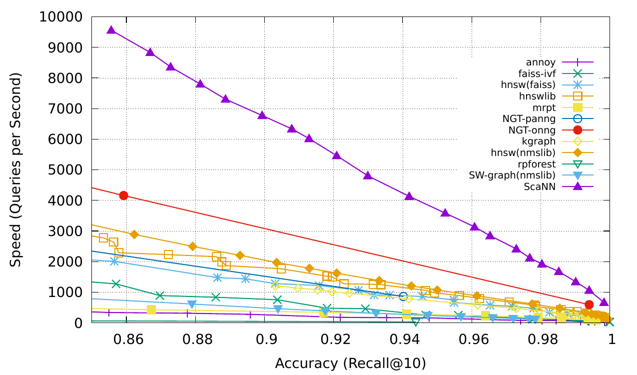

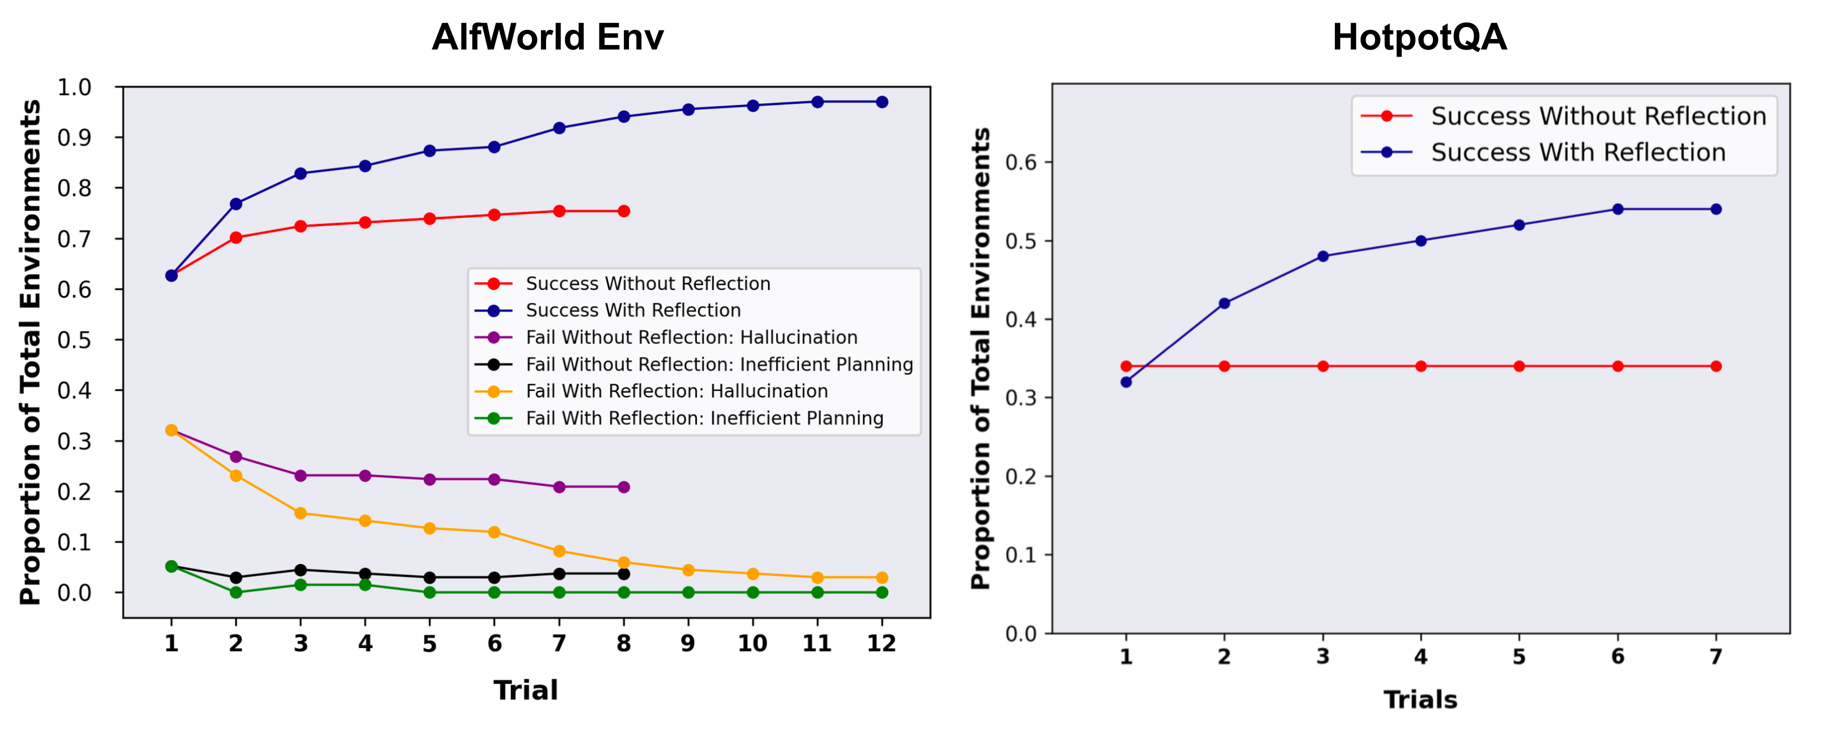

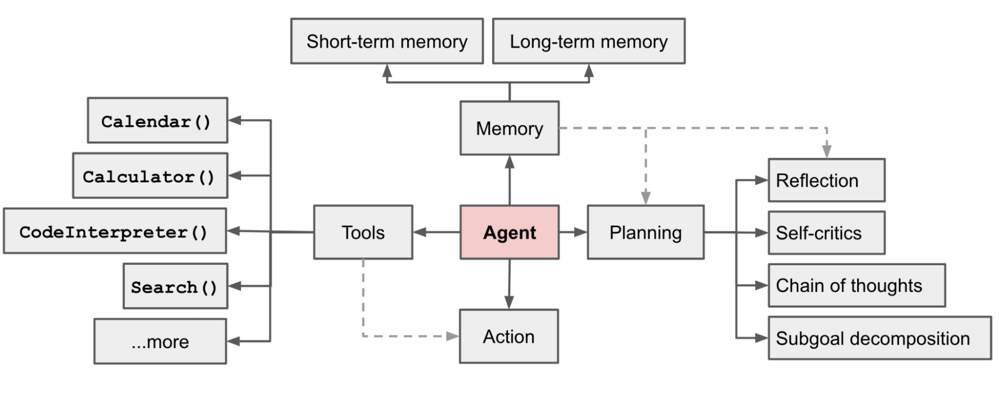

In [19]:
print("---------------Matched Images------------------\n")
display_images(
    [
        matching_results_image_fromdescription_data[0]["img_path"],
        matching_results_image_fromdescription_data[1]["img_path"],
        matching_results_image_fromdescription_data[2]["img_path"],
        matching_results_image_fromdescription_data[3]["img_path"],
    ],
    resize_ratio=0.5,
)

In [20]:
# Image citations. You can check how Gemini generated metadata helped in grounding the answer.

print_text_to_image_citation(
    matching_results_image_fromdescription_data, print_top=False
)

Citation 1: Matched image path, page number and page text: 

score:  0.71
file_name:  LLM Powered Autonomous Agents _ Lil'Log.pdf
path:  images/LLM Powered Autonomous Agents _ Lil'Log.pdf_image_3_0_76.jpeg
page number:  4
page text:  Fig. 2. Examples of reasoning trajectories for knowledge-intensive tasks
(e.g. HotpotQA, FEVER) and decision-making tasks (e.g. AlfWorld Env,
WebShop). (Image source: Yao et al. 2023).
In both experiments on knowledge-intensive tasks and decision-making tasks, ReAct  works
better than the Act -only baseline where Thought:   step is removed.
Reflexion (Shinn & Labash 2023) is a framework to equips agents with dynamic memory and
self-reflection capabilities to improve reasoning skills. Reflexion has a standard RL setup, in
which the reward model provides a simple binary reward and the action space follows the setup
in ReAct where the task-specific action space is augmented with language to enable complex
reasoning steps. After each action 
, the agent comput